In [1]:
import numpy as np
import sympy as sp
import scipy as sc
import matplotlib.pyplot as plt
import ipywidgets as ip
from sympy import Matrix
from sympy.abc import x, y
from sympy.matrices import Matrix
from scipy.optimize import minimize
import scipy.optimize as spo
from scipy.signal import find_peaks
from scipy.signal import argrelextrema
import timeit
from matplotlib.pyplot import figure
import ipywidgets as widgets
from functools import reduce
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [2]:
def MyMatrix(N,alpha,theta):
    Matrix1 = (np.zeros(N*N)).reshape(N,N)
    for i in range(N):
        Matrix1[i,i] = 2*np.cos(2*np.pi*((i+1)*alpha) - theta)+5
    for i in range(N-1):
        Matrix1[i,i+1] = 1
        Matrix1[i+1,i] = 1
        
    Matrix1[0,N-1] = 1
    Matrix1[N-1,0] = 1
    return Matrix1

In [3]:
def Ham(N,alpha,kappa):
    def pbc(i):
        if i==(N):
            return(0)
        elif i==-1:
            return(N-1)
        else:
            return(i)
    
    H=np.zeros((N,N),dtype = 'complex')
    for i in range(N):
        H[i,i] = np.longdouble( 2*np.cos(2*np.pi*((i+1)*alpha)) )
        H[i,pbc(i+1)]= np.cos(np.sqrt(float(0.5))*kappa*np.pi) + complex(0,1)*np.sin(np.sqrt(float(0.5))*kappa*np.pi)
        H[i,pbc(i-1)]= np.cos(np.sqrt(float(0.5))*kappa*np.pi) - complex(0,1)*np.sin(np.sqrt(float(0.5))*kappa*np.pi)
    
    return(H.T)

Time elapsed:  3.734619500115514


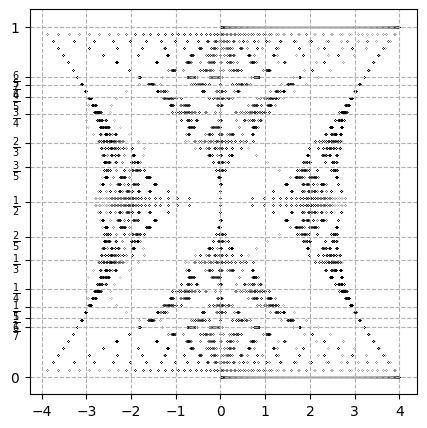

In [4]:
start = timeit.default_timer()

N = 100; 

alpha = np.linspace(0,1,50)
theta = np.linspace(0,1,50)

v1 = np.empty(len(alpha),).astype(object)

def uniontheta(al):
    v = np.empty((len(theta),)).astype(object)
    for th in range(len(theta)):
        v[th] = np.linalg.eigvalsh(Ham(N,al,theta[th]))
    return reduce(np.union1d,(v))
    
for i in range(len(alpha)):
    v1[i] = uniontheta(alpha[i])

fig , ax = plt.subplots(figsize = (5,5))    

for i in range(len(alpha)):
    o = np.ones(len(v1[i]))
    plt.scatter(v1[i],o*alpha[i],0.00005,'black')

plt.yticks([0,1/2,1/3,1/4,1/5,1/6,1/7,2/3,3/4,2/5,3/5,4/5,5/6,6/7,1],[r'$0$',r'$\frac{1}{2}$',r'$\frac{1}{3}$',r'$\frac{1}{4}$',r'$\frac{1}{5}$',r'$\frac{1}{6}$',r'$\frac{1}{7}$',r'$\frac{2}{3}$',r'$\frac{3}{4}$',r'$\frac{2}{5}$',r'$\frac{3}{5}$',r'$\frac{4}{5}$',r'$\frac{5}{6}$',r'$\frac{6}{7}$',r'$1$'])

plt.grid(linestyle='--')
stop = timeit.default_timer()    
print('Time elapsed: ', stop - start) 

Time elapsed:  0.0433203331194818


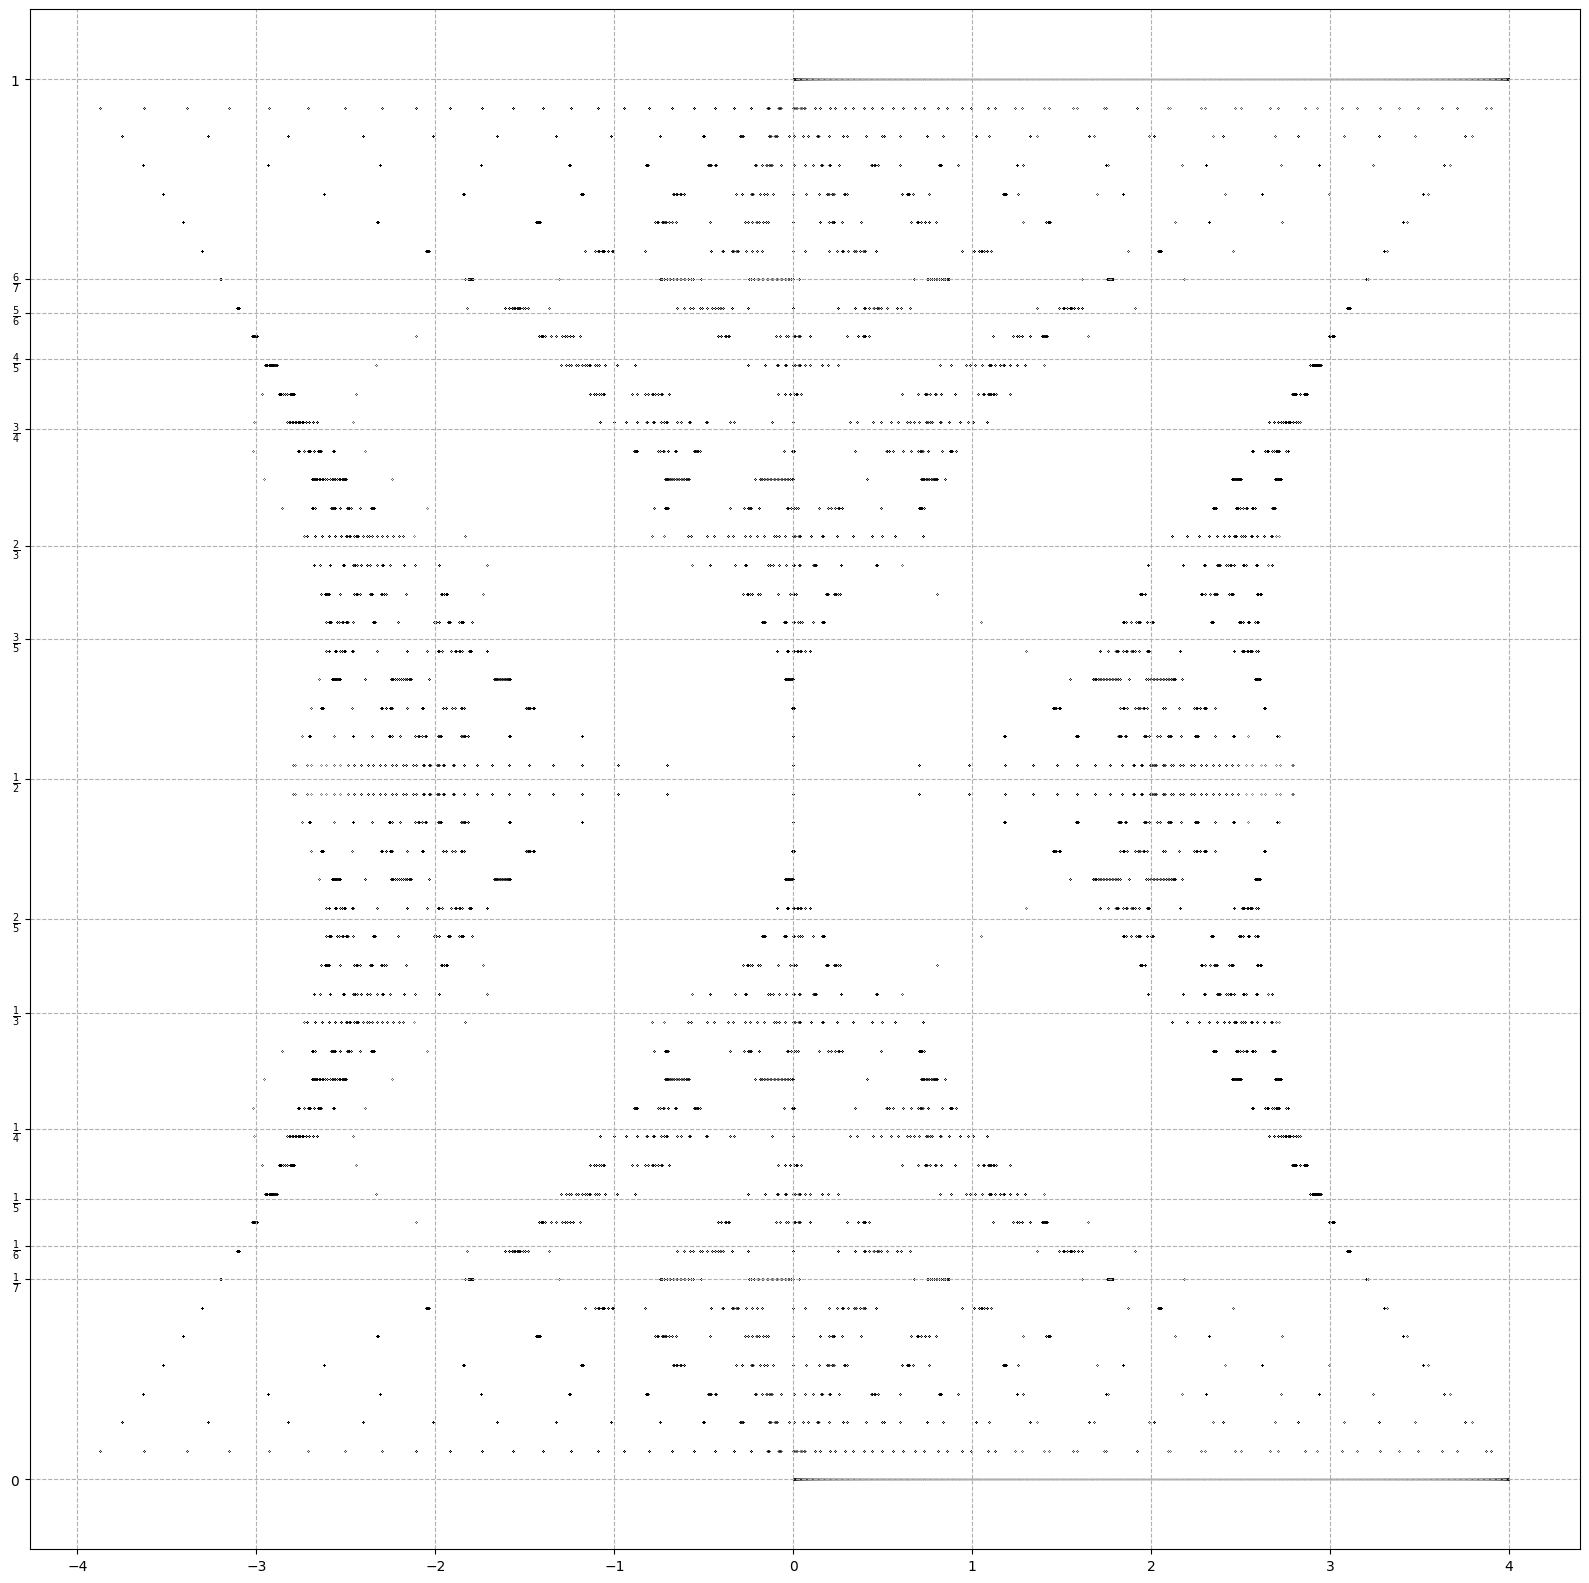

In [5]:
start = timeit.default_timer()

fig , ax = plt.subplots(figsize = (20,20))    

for i in range(len(alpha)):
    o = np.ones(len(v1[i]))
    plt.scatter(v1[i],o*alpha[i],0.0005,'black')

plt.yticks([0,1/2,1/3,1/4,1/5,1/6,1/7,2/3,3/4,2/5,3/5,4/5,5/6,6/7,1],[r'$0$',r'$\frac{1}{2}$',r'$\frac{1}{3}$',r'$\frac{1}{4}$',r'$\frac{1}{5}$',r'$\frac{1}{6}$',r'$\frac{1}{7}$',r'$\frac{2}{3}$',r'$\frac{3}{4}$',r'$\frac{2}{5}$',r'$\frac{3}{5}$',r'$\frac{4}{5}$',r'$\frac{5}{6}$',r'$\frac{6}{7}$',r'$1$'])

plt.grid(linestyle='--')

#plt.savefig('hofs.jpg')
stop = timeit.default_timer()    
print('Time elapsed: ', stop - start) 

In [6]:
N = 100
theta = np.linspace(0,1,10)
alpha = np.linspace(0,1,50)
v = np.empty((len(theta),len(alpha)),).astype(object)

for a in range(len(alpha)):
    for t in range(len(theta)):
        v[t,a] = np.linalg.eigvalsh(Ham(N,alpha[a],theta[t]))

def g(th,a):
    o = np.ones(len(v[th,a]))*alpha[a]
    fig, ax = plt.subplots(figsize = (20,20))
    ax.set(xlim = (-4,4),ylim = (0,1))
    plt.grid()
    return plt.scatter(v[th,a],o,5)


ip.interact(g,th = ip.IntSlider(min=0,max = len(theta)-1, step = 1,layout=widgets.Layout(width='50%')),a = ip.IntSlider(min=0,max = len(alpha)-1, step = 1,layout=widgets.Layout(width='50%')))

interactive(children=(IntSlider(value=0, description='th', layout=Layout(width='50%'), max=9), IntSlider(value…

<function __main__.g(th, a)>

In [7]:
N = 200
theta = np.linspace(0,2*np.pi,50)
alpha = np.linspace(0,1,50)
v = np.empty(len(alpha),).astype(object)

for a in range(len(alpha)):
    v[a] = np.linalg.eigvalsh(Ham(N,alpha[a],1))

def g(a):
    o = np.ones(len(v[a]))*alpha[a]
    fig, ax = plt.subplots(figsize = (5,5))
    ax.set(xlim = (1,9),ylim = (0,1))
    plt.grid()
    return plt.scatter(v[a],o)


ip.interact(g,a = ip.IntSlider(min=0,max = len(alpha)-1, step = 1,layout=widgets.Layout(width='50%')))

interactive(children=(IntSlider(value=0, description='a', layout=Layout(width='50%'), max=49), Output()), _dom…

<function __main__.g(a)>

# <center> Hi <center>